<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

Признаки

- RowNumber — индекс строки в данных
- CustomerId — уникальный идентификатор клиента
- Surname — фамилия
- CreditScore — кредитный рейтинг
- Geography — страна проживания
- Gender — пол
- Age — возраст
- Tenure — сколько лет человек является клиентом банка
- Balance — баланс на счёте
- NumOfProducts — количество продуктов банка, используемых клиентом
- HasCrCard — наличие кредитной карты
- IsActiveMember — активность клиента
- EstimatedSalary — предполагаемая зарплата

Целевой признак

- Exited — факт ухода клиента

## 1. Подготовка данных

### Импортируем требуемые библиотеки

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.metrics import f1_score, confusion_matrix, recall_score, precision_score, precision_recall_curve, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

### Загружаем и изучаем датасет

In [38]:
try:
    data = pd.read_csv('Churn.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/Churn.csv')

In [39]:
data['Tenure'] = data['Tenure'].fillna(0)

In [40]:
print(data.info())
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB
None


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


### Применяем порядковое кодирование
и выводим полученный датасет

In [41]:
encoder = OrdinalEncoder() 
encoder.fit(data) 
data_ordinal = encoder.transform(data) 
data_ordinal = pd.DataFrame(encoder.transform(data), columns=data.columns) 

features = data_ordinal.drop(['Exited'], axis=1)
target = data_ordinal['Exited']

features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=.25, random_state=12345)

print(features_train.shape)
print(features_valid.shape)
print(features_train.info())
features_train.head(10)

(7500, 13)
(2500, 13)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7500 entries, 226 to 4578
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        7500 non-null   float64
 1   CustomerId       7500 non-null   float64
 2   Surname          7500 non-null   float64
 3   CreditScore      7500 non-null   float64
 4   Geography        7500 non-null   float64
 5   Gender           7500 non-null   float64
 6   Age              7500 non-null   float64
 7   Tenure           7500 non-null   float64
 8   Balance          7500 non-null   float64
 9   NumOfProducts    7500 non-null   float64
 10  HasCrCard        7500 non-null   float64
 11  IsActiveMember   7500 non-null   float64
 12  EstimatedSalary  7500 non-null   float64
dtypes: float64(13)
memory usage: 820.3 KB
None


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
226,226.0,8349.0,439.0,303.0,0.0,0.0,12.0,9.0,0.0,1.0,1.0,1.0,1322.0
7756,7756.0,1600.0,1195.0,230.0,2.0,0.0,18.0,7.0,2900.0,0.0,1.0,1.0,7790.0
2065,2065.0,616.0,690.0,235.0,0.0,1.0,15.0,8.0,0.0,1.0,1.0,0.0,6954.0
2800,2800.0,3240.0,487.0,378.0,0.0,1.0,33.0,9.0,5709.0,1.0,1.0,0.0,1965.0
7028,7028.0,2078.0,1888.0,327.0,1.0,1.0,8.0,0.0,5283.0,0.0,0.0,0.0,2501.0
6894,6894.0,5672.0,2803.0,299.0,2.0,1.0,8.0,8.0,2895.0,0.0,1.0,1.0,4150.0
4226,4226.0,7498.0,2869.0,260.0,2.0,0.0,18.0,8.0,0.0,1.0,1.0,0.0,4577.0
5857,5857.0,9922.0,909.0,203.0,0.0,0.0,38.0,0.0,0.0,0.0,1.0,0.0,1279.0
142,142.0,2484.0,919.0,291.0,0.0,0.0,25.0,5.0,3727.0,0.0,1.0,1.0,9657.0
7107,7107.0,8053.0,2001.0,320.0,1.0,0.0,27.0,1.0,1409.0,1.0,1.0,0.0,2480.0


### Выполняем масштабирование признаков

In [42]:
numeric = ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 
           'IsActiveMember', 'EstimatedSalary']

scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])

print(features_train.shape) 

(7500, 13)


## 2. Исследование задачи

На основании подготовленных данных проверим показатели нескольких моделей без учета дисбаланса классов.

In [43]:
features_train.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
226,226.0,8349.0,439.0,0.442946,-0.903514,-1.091944,-0.841540,1.426885,-0.954573,0.817772,0.644278,0.959999,-1.271910
7756,7756.0,1600.0,1195.0,-0.311975,1.513160,-1.091944,-0.270755,0.784858,0.409643,-0.896874,0.644278,0.959999,0.959687
2065,2065.0,616.0,690.0,-0.260268,-0.903514,0.915798,-0.556148,1.105871,-0.954573,0.817772,0.644278,-1.041667,0.671249
2800,2800.0,3240.0,487.0,1.218550,-0.903514,0.915798,1.156208,1.426885,1.731050,0.817772,0.644278,-1.041667,-1.050061
7028,7028.0,2078.0,1888.0,0.691140,0.304823,0.915798,-1.222064,-1.462240,1.530652,-0.896874,-1.552125,-1.041667,-0.865130
6894,6894.0,5672.0,2803.0,0.401581,1.513160,0.915798,-1.222064,1.105871,0.407291,-0.896874,0.644278,0.959999,-0.296190
4226,4226.0,7498.0,2869.0,-0.001733,1.513160,-1.091944,-0.270755,1.105871,-0.954573,0.817772,0.644278,-1.041667,-0.148866
5857,5857.0,9922.0,909.0,-0.591192,-0.903514,-1.091944,1.631862,-1.462240,-0.954573,-0.896874,0.644278,-1.041667,-1.286746
142,142.0,2484.0,919.0,0.318850,-0.903514,-1.091944,0.395161,0.142830,0.798680,-0.896874,0.644278,0.959999,1.603841
7107,7107.0,8053.0,2001.0,0.618750,0.304823,-1.091944,0.585423,-1.141226,-0.291752,0.817772,0.644278,-1.041667,-0.872376


### Проверяем показетели логистической регрессии без учета дисбаланса

In [44]:
disbalanced_model_lr = LogisticRegression(random_state=12345, solver='liblinear')
disbalanced_model_lr.fit(features_train, target_train)
disbalanced_lr_predicted_valid = disbalanced_model_lr.predict(features_valid)

In [45]:
print('Disbalanced logistic regression')
print()
print('Confusion matrix')
print(confusion_matrix(target_valid, disbalanced_lr_predicted_valid))
print('Recall:', recall_score(target_valid, disbalanced_lr_predicted_valid))
print('Precision:', precision_score(target_valid, disbalanced_lr_predicted_valid))
print('F1:', f1_score(target_valid, disbalanced_lr_predicted_valid))

Disbalanced logistic regression

Confusion matrix
[[1887   78]
 [ 427  108]]
Recall: 0.20186915887850468
Precision: 0.5806451612903226
F1: 0.2995839112343967


Понимаю, что эта модель здесь не подходит и не нужна, но было интересно, как она себя покажет:)

### Поиск наиболее эффективные гиперпараметры решающего дерева без учета дисбаланса

In [46]:
disbalanced_best_tree_model = None
disbalanced_best_tree_f1 = 0
disbalanced_best_tree_depth = 0
disbalanced_best_tree_recall = 0
disbalanced_best_tree_precision = 0

for disbalanced_tree_depth in range(1, 10):
    disbalanced_tree_model = DecisionTreeClassifier(random_state=12345, max_depth=disbalanced_tree_depth)
    disbalanced_tree_model.fit(features_train, target_train)
    disbalanced_tree_predictions_valid = disbalanced_tree_model.predict(features_valid)
    disbalanced_tree_f1 = f1_score(target_valid, disbalanced_tree_predictions_valid)
    disbalanced_tree_recall = recall_score(target_valid, disbalanced_tree_predictions_valid)
    disbalanced_tree_precision = precision_score(target_valid, disbalanced_tree_predictions_valid)
    if disbalanced_tree_f1 > disbalanced_best_tree_f1:
        disbalanced_best_tree_model = disbalanced_tree_model
        disbalanced_best_tree_f1 = disbalanced_tree_f1
        disbalanced_best_tree_depth = disbalanced_tree_depth
        disbalanced_best_tree_recall = disbalanced_tree_recall
        disbalanced_best_tree_precision = disbalanced_tree_precision
print("F1 наилучшей модели на валидационной выборке:", disbalanced_best_tree_f1, "Глубина дерева:", disbalanced_best_tree_depth)

/Users/sergejvorobev/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


F1 наилучшей модели на валидационной выборке: 0.558472553699284 Глубина дерева: 7


In [47]:
print('Disbalanced decision tree classifier')
print()
print('Confusion matrix')
print(confusion_matrix(target_valid, disbalanced_tree_predictions_valid))
print('Recall:', disbalanced_best_tree_recall)
print('Precision:', disbalanced_best_tree_precision)
print('F1:', disbalanced_best_tree_f1)

Disbalanced decision tree classifier

Confusion matrix
[[1881   84]
 [ 323  212]]
Recall: 0.4373831775700935
Precision: 0.7722772277227723
F1: 0.558472553699284


### Поиск наиболее эффективные гиперпараметры случайного леса без учета дисбаланса

In [48]:
disbalanced_best_forest_model = None
disbalanced_best_forest_f1 = 0
disbalanced_best_forest_est = 0
disbalanced_best_forest_depth = 0
disbalanced_best_forest_recall = 0
disbalanced_best_forest_precision = 0
for disbalanced_forest_est in range(10, 51, 10):
    for disbalanced_forest_depth in range (1, 11):
        disbalanced_forest_model = RandomForestClassifier(random_state=12345, n_estimators=disbalanced_forest_est, 
                                                          max_depth=disbalanced_forest_depth)
        disbalanced_forest_model.fit(features_train, target_train)
        disbalanced_forest_predictions_valid = disbalanced_forest_model.predict(features_valid)
        disbalanced_forest_f1 = f1_score(target_valid, disbalanced_forest_predictions_valid)
        disbalanced_forest_recall = recall_score(target_valid, disbalanced_forest_predictions_valid)
        disbalanced_forest_precision = precision_score(target_valid, disbalanced_forest_predictions_valid)
        if disbalanced_forest_f1 > disbalanced_best_forest_f1:
            disbalanced_best_forest_model = disbalanced_forest_model
            disbalanced_best_forest_f1 = disbalanced_forest_f1
            disbalanced_best_forest_est = disbalanced_forest_est
            disbalanced_best_forest_depth = disbalanced_forest_depth
            disbalanced_best_forest_recall = disbalanced_forest_recall
            disbalanced_best_forest_precision = disbalanced_forest_precision

print("F1 наилучшей модели на валидационной выборке:", disbalanced_best_forest_f1, 
      "Количество деревьев:", disbalanced_best_forest_est, "Максимальная глубина:", disbalanced_best_forest_depth)

/Users/sergejvorobev/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sergejvorobev/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sergejvorobev/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sergejvorobev/opt/anaconda3/lib/python3.9/site-pack

F1 наилучшей модели на валидационной выборке: 0.5165394402035624 Количество деревьев: 50 Максимальная глубина: 10


In [49]:
print('Disbalanced random forest classifier')
print()
print('Confusion matrix')
print(confusion_matrix(target_valid, disbalanced_forest_predictions_valid))
print('Recall:', disbalanced_best_forest_recall)
print('Precision:', disbalanced_best_forest_precision)
print('F1:', disbalanced_best_forest_f1)

Disbalanced random forest classifier

Confusion matrix
[[1917   48]
 [ 332  203]]
Recall: 0.3794392523364486
Precision: 0.8087649402390438
F1: 0.5165394402035624


### Выводы

Без учета дисбаланса классов лучше всего себя показала модель решающего дерева с глубиной 7, ее показатели:
- Recall: 0.4355140186915888
- Precision: 0.768976897689769
- F1: 0.5560859188544153

## 3. Борьба с дисбалансом

### Проверяем показетели логистической регрессии

In [50]:
model_lr = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model_lr.fit(features_train, target_train)
lr_predicted_valid = model_lr.predict(features_valid)

In [51]:
print('Logistic regression')
print()
print('Confusion matrix')
print(confusion_matrix(target_valid, lr_predicted_valid))
print('Recall:', recall_score(target_valid, lr_predicted_valid))
print('Precision:', precision_score(target_valid, lr_predicted_valid))
print('F1:', f1_score(target_valid, lr_predicted_valid))

Logistic regression

Confusion matrix
[[1363  602]
 [ 164  371]]
Recall: 0.6934579439252336
Precision: 0.381294964028777
F1: 0.4920424403183024


### Поиск наиболее эффективные гиперпараметры решающего дерева

In [52]:
best_tree_model = None
best_tree_f1 = 0
best_tree_depth = 0
best_tree_recall = 0
best_tree_precision = 0

for tree_depth in range(1, 10):
    tree_model = DecisionTreeClassifier(random_state=12345, max_depth=tree_depth, class_weight='balanced')
    tree_model.fit(features_train, target_train)
    tree_predictions_valid = tree_model.predict(features_valid)
    tree_f1 = f1_score(target_valid, tree_predictions_valid)
    tree_recall = recall_score(target_valid, tree_predictions_valid)
    tree_precision = precision_score(target_valid, tree_predictions_valid)
    if tree_f1 > best_tree_f1:
        best_tree_model = tree_model
        best_tree_f1 = tree_f1
        best_tree_depth = tree_depth
        best_tree_recall = tree_recall
        best_tree_precision = tree_precision
print("F1 наилучшей модели на валидационной выборке:", best_tree_f1, "Глубина дерева:", best_tree_depth)

F1 наилучшей модели на валидационной выборке: 0.59967585089141 Глубина дерева: 5


In [53]:
print('Decision tree classifier')
print()
print('Confusion matrix')
print(confusion_matrix(target_valid, tree_predictions_valid))
print('Recall:', best_tree_recall)
print('Precision:', best_tree_precision)
print('F1:', best_tree_f1)

Decision tree classifier

Confusion matrix
[[1457  508]
 [ 154  381]]
Recall: 0.6915887850467289
Precision: 0.5293276108726752
F1: 0.59967585089141


### Поиск наиболее эффективные гиперпараметры случайного леса

In [54]:
best_forest_model = None
best_forest_f1 = 0
best_forest_est = 0
best_forest_depth = 0
best_forest_recall = 0
best_forest_precision = 0
for forest_est in range(10, 51, 10):
    for forest_depth in range (1, 11):
        forest_model = RandomForestClassifier(random_state=12345, n_estimators=forest_est, max_depth=forest_depth, class_weight='balanced')
        forest_model.fit(features_train, target_train)
        forest_predictions_valid = forest_model.predict(features_valid)
        forest_f1 = f1_score(target_valid, forest_predictions_valid)
        forest_recall = recall_score(target_valid, forest_predictions_valid)
        forest_precision = precision_score(target_valid, forest_predictions_valid)
        if forest_f1 > best_forest_f1:
            best_forest_model = forest_model
            best_forest_f1 = forest_f1
            best_forest_est = forest_est
            best_forest_depth = forest_depth
            best_forest_recall = forest_recall
            best_forest_precision = forest_precision

print("F1 наилучшей модели на валидационной выборке:", best_forest_f1, 
      "Количество деревьев:", best_forest_est, "Максимальная глубина:", best_forest_depth)

F1 наилучшей модели на валидационной выборке: 0.6405990016638936 Количество деревьев: 50 Максимальная глубина: 8


In [55]:
print('Random forest classifier')
print()
print('Confusion matrix')
print(confusion_matrix(target_valid, forest_predictions_valid))
print('Recall:', best_forest_recall)
print('Precision:', best_forest_precision)
print('F1:', best_forest_f1)

Random forest classifier

Confusion matrix
[[1758  207]
 [ 203  332]]
Recall: 0.719626168224299
Precision: 0.5772113943028486
F1: 0.6405990016638936


С учетом дисбаланса классов и применения гиперпараметра class_weight='balanced' лучшей моделью оказалась случайный лес с количеством деревьев равной 50и и глубиной равной 8и. Ее показатели:
- Recall: 0.7065420560747664
- Precision: 0.5806451612903226
- F1: 0.6374367622259697

### Тестируем изменение порога классификации

In [56]:
probabilities_valid = best_forest_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(.44, .69, 0.01):
    threshold_predicted_valid = probabilities_one_valid > threshold
    f1 = f1_score(target_valid, threshold_predicted_valid)
                          
    print("Порог = {:.2f} | F1 = {:.3f}".format(
        threshold, f1))

Порог = 0.44 | F1 = 0.616
Порог = 0.45 | F1 = 0.619
Порог = 0.46 | F1 = 0.618
Порог = 0.47 | F1 = 0.620
Порог = 0.48 | F1 = 0.628
Порог = 0.49 | F1 = 0.634
Порог = 0.50 | F1 = 0.641
Порог = 0.51 | F1 = 0.627
Порог = 0.52 | F1 = 0.630
Порог = 0.53 | F1 = 0.630
Порог = 0.54 | F1 = 0.631
Порог = 0.55 | F1 = 0.631
Порог = 0.56 | F1 = 0.625
Порог = 0.57 | F1 = 0.618
Порог = 0.58 | F1 = 0.620
Порог = 0.59 | F1 = 0.608
Порог = 0.60 | F1 = 0.602
Порог = 0.61 | F1 = 0.587
Порог = 0.62 | F1 = 0.581
Порог = 0.63 | F1 = 0.572
Порог = 0.64 | F1 = 0.560
Порог = 0.65 | F1 = 0.549
Порог = 0.66 | F1 = 0.536
Порог = 0.67 | F1 = 0.526
Порог = 0.68 | F1 = 0.514


Изменения порога классификации не принесли положительных результатов.

### Тестируем увеличение и уменьшение выборки

In [57]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 5)

best_forest_upsampled_model = best_forest_model.fit(features_upsampled, target_upsampled)
upsampled_predicted_valid = best_forest_upsampled_model.predict(features_valid)

print("F1 при увеличении количества положительных результатов:", f1_score(target_valid, upsampled_predicted_valid))

F1 при увеличении количества положительных результатов: 0.6228983186549238


In [58]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] * repeat + [features_ones])
    target_upsampled = pd.concat([target_zeros] * repeat + [target_ones])
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 5)

best_forest_upsampled_model = best_forest_model.fit(features_upsampled, target_upsampled)
upsampled_predicted_valid = best_forest_upsampled_model.predict(features_valid)

print("F1 при увеличении количества отрицательных результатов:", f1_score(target_valid, upsampled_predicted_valid))

F1 при увеличении количества отрицательных результатов: 0.6259673258813414


In [59]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.1)

best_forest_downsampled_model = best_forest_model.fit(features_downsampled, target_downsampled)
downsemled_predicted_valid = best_forest_downsampled_model.predict(features_valid)

print("F1 при уменьшении количества отрицательных результатов:", f1_score(target_valid, downsemled_predicted_valid))

F1 при уменьшении количества отрицательных результатов: 0.5650224215246638


In [60]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros] + [features_ones.sample(frac=fraction, random_state=12345)])
    target_downsampled = pd.concat(
        [target_zeros] + [target_ones.sample(frac=fraction, random_state=12345)])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.1)

best_forest_downsampled_model = best_forest_model.fit(features_downsampled, target_downsampled)
downsemled_predicted_valid = best_forest_downsampled_model.predict(features_valid)

print("F1 при уменьшении количества положительных результатов:", f1_score(target_valid, downsemled_predicted_valid))

F1 при уменьшении количества положительных результатов: 0.31268436578171094


### Выводы

Ни один из метедов в дополнении к гиперпараметру не увеличил качество модели.

## 4. Тестирование модели

In [61]:
best_forest_model

RandomForestClassifier(class_weight='balanced', max_depth=8, n_estimators=50,
                       random_state=12345)

Финальная модель является случайным лесом со сбалансированными весам классов, количеством деревьев 50 и глубиной 8. Модель обучена на стандартной тренировочной выборке.

In [62]:
best_forest_model.fit(features_train, target_train)
final_result = best_forest_model.predict(features_valid)
print("Final F1:", f1_score(target_valid, final_result))

Final F1: 0.6405990016638936


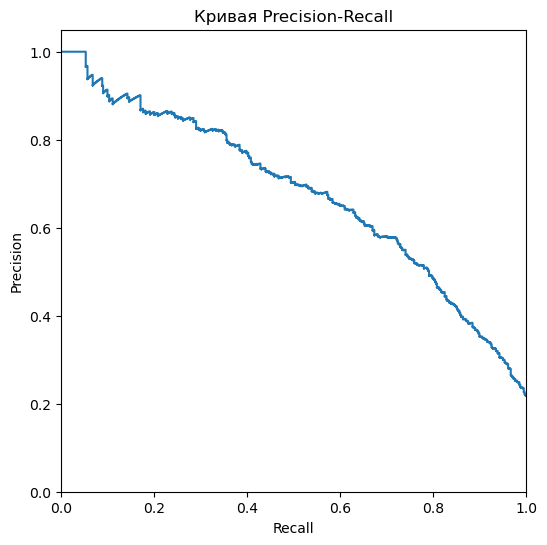

In [63]:
precision, recall, thresholds = precision_recall_curve(target_valid, probabilities_valid[:, 1])

plt.figure(figsize=(6, 6))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Кривая Precision-Recall')
plt.show() 

На графике по вертикали наносится значение точности, по горизонтали — полноты. PR-кривая показывает достаточно высокий результат

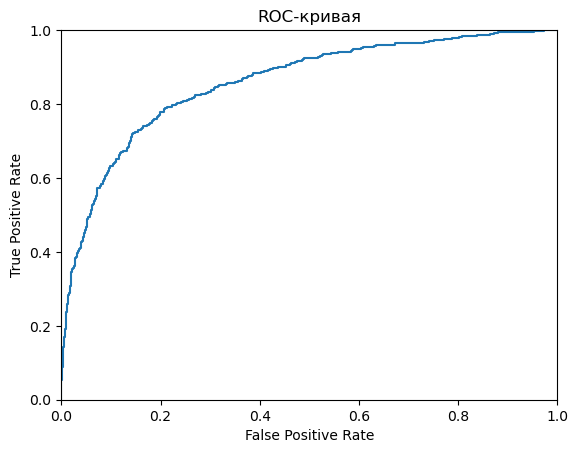

AUC-ROC: 0.8580685358255451


In [64]:
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_valid[:, 1])

plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show() 

print("AUC-ROC:", roc_auc_score(target_valid, probabilities_valid[:, 1]))

Показатели ROC-кривой сильно выше случайного классификатора. Это подтверждает и показатель AUC-ROC, который равен ~0.86.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [х]  Весь код выполняется без ошибок
- [х]  Ячейки с кодом расположены в порядке исполнения
- [х]  Выполнен шаг 1: данные подготовлены
- [х]  Выполнен шаг 2: задача исследована
    - [х]  Исследован баланс классов
    - [х]  Изучены модели без учёта дисбаланса
    - [х]  Написаны выводы по результатам исследования
- [х]  Выполнен шаг 3: учтён дисбаланс
    - [х]  Применено несколько способов борьбы с дисбалансом
    - [х]  Написаны выводы по результатам исследования
- [х]  Выполнен шаг 4: проведено тестирование
- [х]  Удалось достичь *F1*-меры не менее 0.59
- [х]  Исследована метрика *AUC-ROC*